<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches

%pylab inline

Populating the interactive namespace from numpy and matplotlib


check the spoonerism time order. upload the tasks so that I can check how the results look like.
change the colours and change the labels to the appropriate ones.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sns.set()

In [4]:
# put everything in a separate folder
working_path = Path('/content/drive/MyDrive/KKNV/data/tv/tv')

In [5]:
cd /content/drive/MyDrive/KKNV/data/tv/tv

/content/drive/MyDrive/KKNV/data/tv/tv


In [6]:
!ls /content/drive/MyDrive/KKNV/data/tv/tv

eric1						 kristin1
Eric1-Spoonerism_task-20240618-161241-URNMB.log  Kristin1-Spoonerism_task-20240618-134500-ZSUHL.log
eric2						 kristin2
Eric2-Spoonerism_task-20240618-171104-WDRWI.log  Kristin2-Spoonerism_task-20240618-144003-RURVT.log


## RAN results



In [42]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2
# RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['Eric', 'stim', 0, 0, 15.39, 16.72, 0, 0, 15.85, 15.88] # stimulation
raw2 = ['Eric', 'sham', 0, 0, 19.29, 18.46, 0, 0, 17.34, 18.74] # sham
raw3 = ['Kristin', 'stim', 0, 0, 14.30, 15.84, 0, 0, 15.48, 17.2] # stimulation
raw4 = ['Kristin', 'sham', 0, 0, 17.20, 17.52, 0, 0, 18.21, 16.10] # sham

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [43]:
df = pd.DataFrame(rows, columns=column_names)

In [44]:
df['Genauigkeit'] = 50 - df[['RANL ACC 1', 'RANL ACC 2', 'RANN ACC 1', 'RANN ACC 2']].mean(axis=1)
df['Reaktionszeit'] = df[['RANL RT 1', 'RANL RT 2', 'RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [45]:
df['Genauigkeit'] = df['Genauigkeit'].astype(int)

In [46]:
df[['Subject', 'Session', 'Genauigkeit', 'Reaktionszeit']]

,Subject,Session,Genauigkeit,Reaktionszeit
0,Eric,stim,50,15.9525
1,Eric,sham,50,18.1075
2,Kristin,stim,50,15.2750
3,Kristin,sham,50,17.7850


In [ ]:
eric_colors = ['#0000FF', '#ADD8E6']  # Blue shades
kristin_colors = ['#008000', '#90EE90']  # Green shades


eric_colors = ['#1E90FF', '#87CEFA']  # Dark Blue, Light Blue
kristin_colors = ['#006400', '#32CD32']  # Dark Green, Light Green

eric_colors = ['#008080', '#20B2AA']  # Dark Teal, Light Teal
kristin_colors = ['#556B2F', '#9ACD32']  # Dark Olive, Light Olive

eric_colors = ['#800080', '#DDA0DD']  # Dark Purple, Light Purple
kristin_colors = ['#FF8C00', '#FFD700']  # Dark Orange, Light Orange

In [47]:
def create_plots(data, plot, title):
  bar_width = 0.7
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(6, 6))

  eric_colors = ['#1E90FF', '#87CEFA']  # Dark Blue, Light Blue
  kristin_colors = ['#006400', '#32CD32']  # Dark Green, Light Green

  legend_handles = {}

  #session 1 = stimulation, session 2 = sham

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 'stim')][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 'sham')][plot].mean()

      if subject == 'Eric':
            session1_color = eric_colors[0]
            session2_color = eric_colors[1]
      elif subject == 'Kristin':
            session1_color = kristin_colors[0]
            session2_color = kristin_colors[1]
      else:
            session1_color = '#AEC6CF'  # Default color if needed
            session2_color = '#FFB347'  # Default color if needed


      if subject not in legend_handles:
            legend_handles[subject] = (mpatches.Patch(color=session1_color, label='Stimulation'),
                                       mpatches.Patch(color=session2_color, label='Keine Stimulation'))

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=session1_color)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Keine Stimulation' if i == 0 else "", color=session2_color)


      ax.annotate(f'{session1_value:.2f}',
                    xy=(i * 2 - bar_width / 2, session1_value),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

      ax.annotate(f'{session2_value:.2f}',
                    xy=(i * 2 + bar_width / 2, session2_value),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

  handles = [item for sublist in legend_handles.values() for item in sublist]
  labels = [item.get_label() for item in handles]
  plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

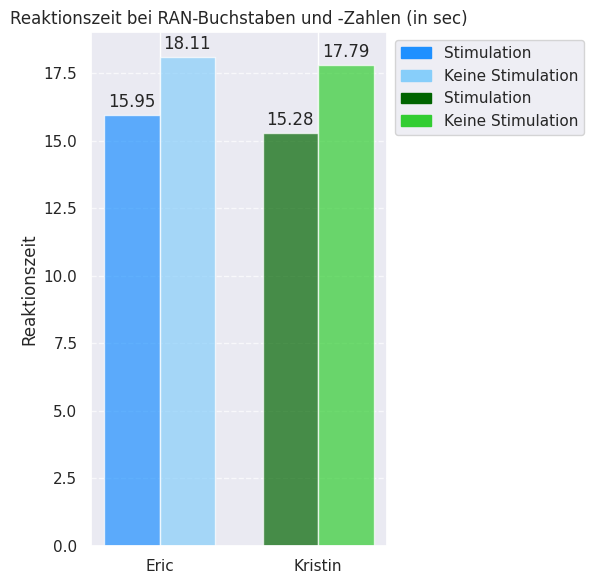

In [48]:
#create_plots(df, 'Genauigkeit', 'Genauigkeit bei RAN-Buchstaben und -Zahlen')
#print('')
#print('')
#print('')
create_plots(df, 'Reaktionszeit', 'Reaktionszeit bei RAN-Buchstaben und -Zahlen (in sec)')

## Spoonerism

For spoonerism, we have 20 trials with a slide of instruction in between. instruction slides - 10 with nouns - instrcution - 10 with verbs - end slide

In [49]:
# change the names of the files according to the format
# "Erik_stimulation.log", "Erik_sham.log"
# "Kristin_stimulation.log", "Kristin_sham.log"
file_names = [
    "Eric1.log", "Eric2.log",
    "Kristin1.log", "Kristin2.log"
]

In [55]:
# for reaction time
# session 1 = no stimulation, session 2 = stimulation
all_data = pd.DataFrame()
for name in file_names:
  data = pd.read_csv(
        working_path.joinpath(name),
        delimiter='\t', skiprows=1, encoding='utf-8', on_bad_lines='skip')
  df = data.reset_index()
  df.columns = df.iloc[0]
  df = df.drop(0)
  df = df[['Subject', 'Trial', 'Time', 'TTime']]
  df = df.drop([1, 2, 3, 4, 5, 6, 7, 18, 29, 30], axis = 0)
  if '1' in name:
    df['Session'] = 'sham'
  elif '2' in name:
    df['Session'] = 'stim'
  all_data = pd.concat([all_data, df])

In [56]:
all_data = all_data.rename({'TTime':'Reaktionszeit'}, axis=1)
all_data['Reaktionszeit'] = all_data['Reaktionszeit'].astype(int)
all_data['Reaktionszeit'] = np.log(all_data['Reaktionszeit'])

In [59]:
all_data

,Subject,Trial,Time,Reaktionszeit,Session
8,Eric1,8,1058297,11.167925,sham
9,Eric1,9,1122537,11.067263,sham
10,Eric1,10,1194857,11.186821,sham
11,Eric1,11,1265737,11.166158,sham
12,Eric1,12,1327417,11.027150,sham
...,...,...,...,...,...
24,Kristin2,24,1166374,11.072294,stim
25,Kristin2,25,1231174,11.076635,stim
26,Kristin2,26,1292454,11.019776,stim
27,Kristin2,27,1353894,11.023927,stim


In [60]:
# simulation
subject1 = ['Eric'] * 40
subject2 = ['Kristin'] * 40
subject = subject1 + subject2

In [61]:
all_data['Subject'] = subject

In [62]:
# adding the accuracy results in the spoonerism task
eric_sham = [1] * 18 + [0] * 2
eric_stim = [1] * 17 + [0] * 3
kris_sham = [1] * 16 + [0] * 4
kris_stim = [1] * 17 + [0] * 3
accuracy = eric_sham + eric_stim + kris_sham + kris_stim  # exactly in this order

In [63]:
all_data['Genauigkeit'] = accuracy

In [64]:
all_data

,Subject,Trial,Time,Reaktionszeit,Session,Genauigkeit
8,Eric,8,1058297,11.167925,sham,1
9,Eric,9,1122537,11.067263,sham,1
10,Eric,10,1194857,11.186821,sham,1
11,Eric,11,1265737,11.166158,sham,1
12,Eric,12,1327417,11.027150,sham,1
...,...,...,...,...,...,...
24,Kristin,24,1166374,11.072294,stim,1
25,Kristin,25,1231174,11.076635,stim,1
26,Kristin,26,1292454,11.019776,stim,0
27,Kristin,27,1353894,11.023927,stim,0


In [65]:
def create_plots(data, plot, title):
  bar_width = 0.7
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(6, 6))

  eric_colors = ['#1E90FF', '#87CEFA']  # Dark Blue, Light Blue
  kristin_colors = ['#006400', '#32CD32']  # Dark Green, Light Green

  legend_handles = {}

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 'stim')][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 'sham')][plot].mean()

      if subject == 'Eric':
            session1_color = eric_colors[0]
            session2_color = eric_colors[1]
      elif subject == 'Kristin':
            session1_color = kristin_colors[0]
            session2_color = kristin_colors[1]
      else:
            session1_color = '#AEC6CF'  # Default color if needed
            session2_color = '#FFB347'  # Default color if needed

      if subject not in legend_handles:
            legend_handles[subject] = (mpatches.Patch(color=session1_color, label='Stimulation'),
                                       mpatches.Patch(color=session2_color, label='Keine Stimulation'))

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=session1_color)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Keine Stimulation' if i == 0 else "", color=session2_color)

      ax.annotate(f'{session1_value:.2f}',
                    xy=(i * 2 - bar_width / 2, session1_value),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

      ax.annotate(f'{session2_value:.2f}',
                    xy=(i * 2 + bar_width / 2, session2_value),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

  handles = [item for sublist in legend_handles.values() for item in sublist]
  labels = [item.get_label() for item in handles]
  plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

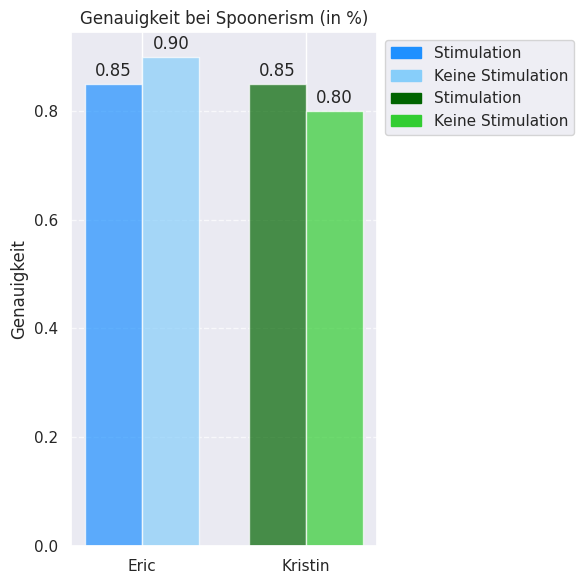

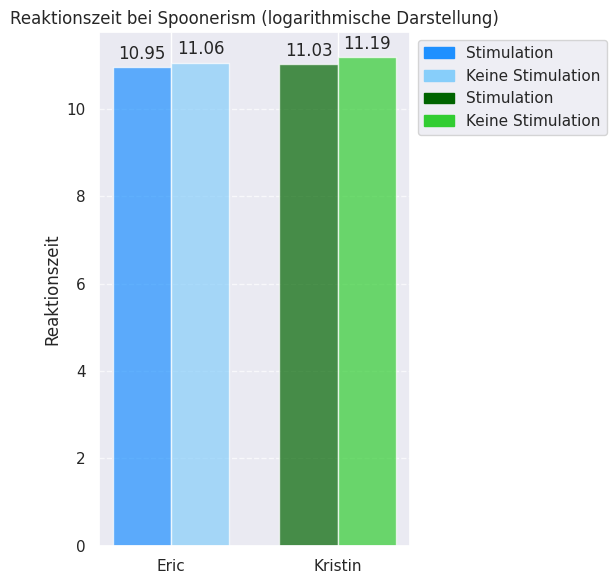

In [66]:
create_plots(all_data, 'Genauigkeit', 'Genauigkeit bei Spoonerism (in %)')
create_plots(all_data, 'Reaktionszeit', 'Reaktionszeit bei Spoonerism (logarithmische Darstellung)')

## Motion perception

We usually have 3-4 or more files for motion perception because we restarting it several times. The first short one is always practice. One could ignore it.

In [ ]:
!ls /content/drive/MyDrive/KKNV/data/tv/motion

Erik_sham_left.csv   Erik_stim_left.csv   Kris_sham_left.csv   Kris_stim_left.csv
Erik_sham_right.csv  Erik_stim_right.csv  Kris_sham_right.csv  Kris_stim_right.csv


We have three files that one might use: base report, staircase left and right. We can build staircases for two hemifields.

In [ ]:
working_path = Path('/content/drive/MyDrive/KKNV/data/tv/motion/')

In [ ]:
def inspect_file(file_path, num_lines=20):
    with open(file_path, 'r', encoding='utf-8') as f:
        for i in range(num_lines):
            print(f"{i}: {f.readline()}")

In [ ]:
# Inspect the first few lines of the file
file_path = working_path.joinpath('StaircaseValuesR.csv')
inspect_file(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/KKNV/data/tv/motion/StaircaseValuesR.csv'

So imagine, we have sets of data from Erik sham and stim and Kristin sham and stim. Also the information comes from different visual fields

In [ ]:
def read_staircase(file_path):
    # Initialize dictionaries to store different sections
    metadata = {}
    reversal_list = []
    response_data = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Extract metadata
    metadata_row = lines[0].strip().split(',')
    metadata_values = lines[1].strip().split(',')
    metadata = dict(zip(metadata_row, metadata_values))

    # Find the start indices for each section
    reversal_start_idx = lines.index('Reversal List\n') + 1
    response_start_idx = lines.index('Response,Staircase Points\n') + 1

    # Extract response data
    response_data = pd.read_csv(file_path, delimiter=',', skiprows=response_start_idx - 1)

    return metadata, response_data

In [ ]:
file_names = ['Erik_sham_left', 'Erik_sham_right',
              'Erik_stim_left', 'Erik_stim_right',
              'Kris_sham_left', 'Kris_sham_right',
              'Kris_stim_left', 'Kris_stim_right']

In [ ]:
# collecting all the information from each of the files in the all_datasets
meta_all = pd.DataFrame()
response_all = pd.DataFrame()
for name in file_names:
  meta, response = read_staircase(
    working_path.joinpath(name + '.csv')
    )
  new_meta = pd.DataFrame([meta])
  new_meta['Session'] = name
  meta_all = pd.concat([meta_all, new_meta])

  response['Session'] = name
  response_all = pd.concat([response_all, response])
meta_all['Estimated threshold '] = meta_all['Estimated threshold '].astype(float)

In [ ]:
df = meta_all[['Estimated threshold ', 'Session']]
df['Subject'] = ['Eric'] * 4 + ['Kristin'] * 4
df['Seite'] = ['Left visual field/Linkes Gesichtsfeld', 'Right visual field/Rechtes Gesichtsfeld'] * 4
df['Session_new'] = ['Keine Stimulation', 'Keine Stimulation', 'Stimulation', 'Stimulation',
                     'Keine Stimulation', 'Keine Stimulation', 'Stimulation', 'Stimulation']

<ipython-input-32-71c0a7dbe94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'] = ['Eric'] * 4 + ['Kristin'] * 4
<ipython-input-32-71c0a7dbe94b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seite'] = ['Left visual field/Linkes Gesichtsfeld', 'Right visual field/Rechtes Gesichtsfeld'] * 4
<ipython-input-32-71c0a7dbe94b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

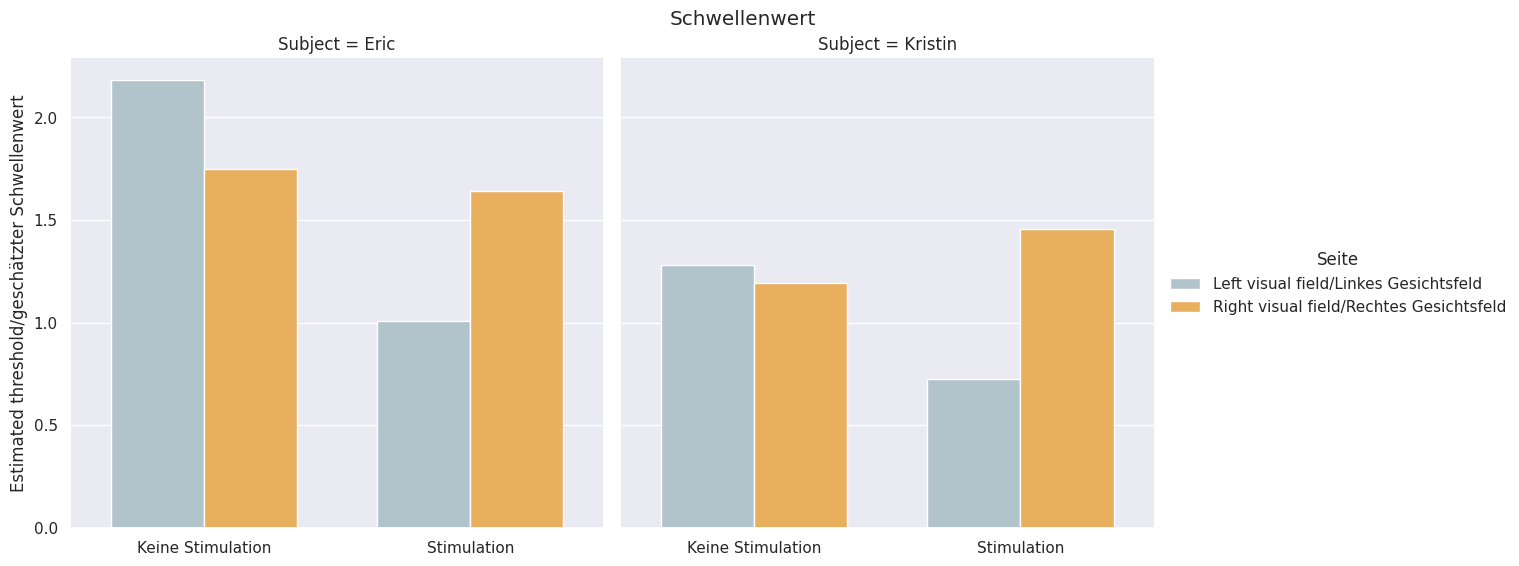

In [ ]:
pastel_blue = '#AEC6CF'
pastel_orange = '#FFB347'
custom_palette = [pastel_blue, pastel_orange]
threshold = sns.catplot(
    data=df, kind='bar',
    x='Session_new', y='Estimated threshold ', hue='Seite', col='Subject',
    height=6, errorbar=None, width = 0.7,
    palette=custom_palette
)
threshold.despine(left=True)
threshold.set_axis_labels("", "Estimated threshold/geschätzter Schwellenwert")
threshold.fig.suptitle("Schwellenwert")
threshold.fig.subplots_adjust(top=0.9)
#threshold.legend.set_title("The ")

In [ ]:
response_all

,Response,Staircase Points,Session
0,0.0,1.00,Erik_sham_left
1,0.0,1.08,Erik_sham_left
2,0.0,1.16,Erik_sham_left
3,0.0,1.24,Erik_sham_left
4,0.0,1.32,Erik_sham_left
...,...,...,...
42,1.0,1.66,Kris_stim_right
43,1.0,1.64,Kris_stim_right
44,1.0,1.62,Kris_stim_right
45,0.0,1.60,Kris_stim_right


In [ ]:
def create_staircase(response_data, meta_data, session): # Session = Kris_stim etc.
  left_field = response_data[response_data['Session'] == session + '_left']
  right_field = response_data[response_data['Session'] == session + '_right']
  left_meta = meta_data[meta_data['Session'] == session + '_left']
  right_meta = meta_data[meta_data['Session'] == session + '_right']

  trial_numbers_right = list(range(1, len(right_field['Staircase Points'].values) + 1))
  trial_numbers_left = list(range(1, len(left_field['Staircase Points'].values) + 1))

  # Plot staircase points as intensities
  plt.figure(figsize=(10, 5))
  plt.plot(trial_numbers_right, right_field['Staircase Points'].values, marker='o', linestyle='-', color='blue',
         alpha=0.5,
         label='Staircase Points (right visual field)')
  plt.plot(trial_numbers_left, left_field['Staircase Points'].values, marker='o', linestyle='-', color='red',
         alpha=0.5, label='Staircase Points (left visual field)')

  plt.axhline(y=right_meta['Estimated threshold '].values[0], color='lightblue', linestyle='--', label='Estimated Threshold (right visual field)')
  plt.axhline(y=left_meta['Estimated threshold '].values[0], color='salmon', linestyle='--', label='Estimated Threshold (left visual field)')

  if 'Kris' in session:
    name = 'Kristin'
  elif 'Erik' in session:
    name = 'Eric'

  if 'stim' in session:
    condition = 'stimulation'
  elif 'sham' in session:
    condition = 'sham'

# Label axes and add title
  plt.xlabel('Trial Number')
  plt.ylabel('Stimulus Intensity')
  plt.title('Staircase plot for ' + name + ' during ' + condition + ' session')
  plt.legend()

  # Show plot
  plt.grid(True)
  plt.show()

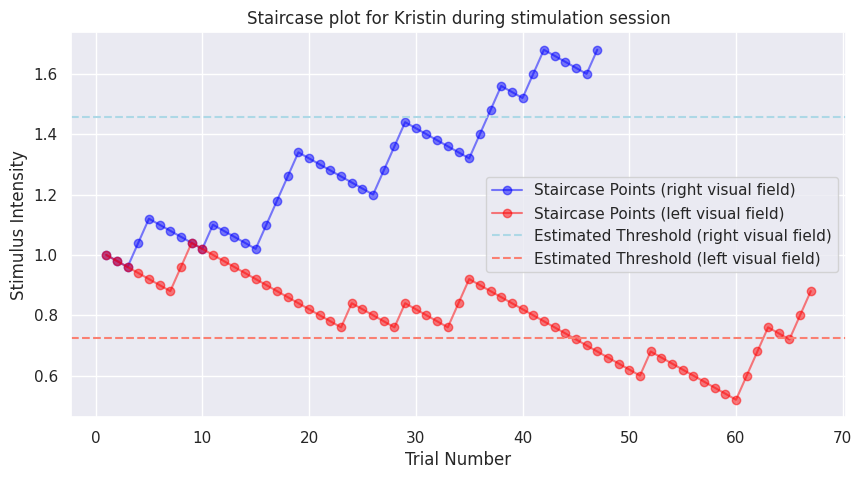

In [ ]:
create_staircase(response_all, meta_all, 'Kris_stim')

**Left over**

In [ ]:
# reading base report file
def read_basereport_file(file_path, data_start_row, delimiter=','):
    try:
        # Read the CSV file starting from the actual data row, with the correct delimiter
        data = pd.read_csv(file_path, delimiter=delimiter, skiprows=data_start_row, on_bad_lines='skip')
        return data
    except pd.errors.ParserError as pe:
        print(f"Parser error: {pe}")
        return None
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Example usage
data_start_row = 7  # Adjust this value based on where your actual data starts (0-based index)
delimiter = ','  # Adjust the delimiter if necessary
basereport = read_basereport_file(working_path.joinpath('BaseReport.csv'), data_start_row, delimiter)

In [ ]:
# working on base report
# maybe correct tril is when it is True in the "Is Triggered Correct ROI"
basereport.drop(['Speed Increase', 'TFIncrease', 'Block Number'], axis='columns', inplace=True)

In [ ]:
 # building a plot on accuracy over trials
responses = basereport['Is Triggered Correct ROI'].values  #False for incorrect, True for correct
trials = basereport['Total Trial Number'].values
resp = []
for response in responses:
  if response == True:
    resp.append(1)
  elif response == False:
    resp.append(0)
  else:
    print(response)
    break

accuracy = np.cumsum(resp) / np.arange(1, 63)
plt.figure(figsize=(10, 5))
plt.plot(trials, accuracy, marker='o', linestyle='-')
plt.xlabel('Trial Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Response Accuracy Over Trials')
plt.grid(True)
plt.show()

In [ ]:
def read_staircase(file_path):
    # Initialize dictionaries to store different sections
    metadata = {}
    reversal_list = []
    response_data = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Extract metadata
    metadata_row = lines[0].strip().split(',')
    metadata_values = lines[1].strip().split(',')
    metadata = dict(zip(metadata_row, metadata_values))

    # Find the start indices for each section
    reversal_start_idx = lines.index('Reversal List\n') + 1
    response_start_idx = lines.index('Response,Staircase Points\n') + 1

    # Extract reversal list
    for line in lines[reversal_start_idx:response_start_idx - 2]:
        reversal_list.extend(line.strip().split(','))

    # Extract response data
    response_data = pd.read_csv(file_path, delimiter=',', skiprows=response_start_idx - 1)

    return metadata, reversal_list, response_data